<h1 align='center'> Analisis del Futbol Argentino con datos de Transfer Markt <h1>


En este trabajo, se ha realizado un análisis exhaustivo de una base de datos propia obtenida de la prestigiosa página de Transfer Markt. Los datos recopilados abarcan un amplio período, desde la Temporada 2008 hasta el 2022.

Con el objetivo de enfocar el análisis en los jugadores más destacados, se seleccionaron cuidadosamente los 18 equipos con mayor cantidad de temporadas en dicho período. Esta elección garantiza que la muestra represente con fidelidad la presencia y evolución de los jugadores a lo largo de los años.

La base de datos proporciona información sobre:

-Nombre completo del jugador.
-Posición
-Edad
-Altura
-Pie
-Equipo Anterior
-Valor de Mercado
-Temporada
-Club actual.
 

Mediante análisis estadísticos y visualizaciones gráficas, este estudio busca descubrir patrones, tendencias y comportamientos notables en el rendimiento y características de los jugadores a lo largo del tiempo. Asimismo, se realizarán comparaciones y exploraciones sobre los factores que influyen en el valor de mercado de los futbolistas.

Los hallazgos de este análisis proporcionarán valiosos conocimientos tanto para aficionados apasionados del fútbol como para profesionales del deporte. Además, contribuirán a una mayor comprensión de la dinámica del mercado de jugadores y el impacto de diferentes variables en su valor.

En resumen, este trabajo se presenta como una valiosa contribución al análisis de datos deportivos, permitiéndonos descubrir fascinantes perspectivas sobre los futbolistas más destacados de los últimos años y su trayectoria en el fútbol argentino.


**Se instalan los paquetes**

In [104]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import datetime as dt
import calendar
import datetime
from datetime import datetime, timedelta, date
import warnings
import os
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import ensemble
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


print("Paquetes instalados correctamente")



Paquetes instalados correctamente


**Obtención de la Base de Datos**

In [106]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

headers = {
    'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'
}

page_urls = [
    #Argentinos Juniors
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/saison_id/2007/plus/1",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2008",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2009",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2010",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2011",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2012",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2013",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2014",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2015",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2016",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2017",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2018",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2019",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2020",
    "https://www.transfermarkt.com.ar/aa-argentinos-juniors/kader/verein/1030/plus/1/galerie/0?saison_id=2021",
   
    # Arsenal
    "https://www.transfermarkt.com.ar/arsenal-futbol-club/kader/verein/4673/saison_id/2007/plus/1",
    "https://www.transfermarkt.com.ar/arsenal-futbol-club/kader/verein/4673/saison_id/2008/plus/1",
    "https://www.transfermarkt.com.ar/arsenal-futbol-club/kader/verein/4673/saison_id/2009/plus/1",
    "https://www.transfermarkt.com.ar/arsenal-futbol-club/kader/verein/4673/saison_id/2010/plus/1",
    "https://www.transfermarkt.com.ar/arsenal-futbol-club/kader/verein/4673/saison_id/2011/plus/1",
    "https://www.transfermarkt.com.ar/arsenal-futbol-club/kader/verein/4673/saison_id/2012/plus/1",
    "https://www.transfermarkt.com.ar/arsenal-futbol-club/kader/verein/4673/saison_id/2013/plus/1",
    "https://www.transfermarkt.com.ar/arsenal-futbol-club/kader/verein/4673/saison_id/2014/plus/1",
    "https://www.transfermarkt.com.ar/arsenal-futbol-club/kader/verein/4673/saison_id/2015/plus/1",
    "https://www.transfermarkt.com.ar/arsenal-futbol-club/kader/verein/4673/saison_id/2016/plus/1",
    "https://www.transfermarkt.com.ar/arsenal-futbol-club/kader/verein/4673/saison_id/2017/plus/1",
    "https://www.transfermarkt.com.ar/arsenal-futbol-club/kader/verein/4673/saison_id/2018/plus/1",
    "https://www.transfermarkt.com.ar/arsenal-futbol-club/kader/verein/4673/saison_id/2019/plus/1",
    "https://www.transfermarkt.com.ar/arsenal-futbol-club/kader/verein/4673/saison_id/2020/plus/1",
    "https://www.transfermarkt.com.ar/arsenal-futbol-club/kader/verein/4673/saison_id/2021/plus/1",
     
     #Banfield
    "https://www.transfermarkt.com.ar/ca-banfield/kader/verein/830/plus/1/galerie/0?saison_id=2007",
    "https://www.transfermarkt.com.ar/ca-banfield/kader/verein/830/plus/1/galerie/0?saison_id=2008",
    "https://www.transfermarkt.com.ar/ca-banfield/kader/verein/830/plus/1/galerie/0?saison_id=2009",
    "https://www.transfermarkt.com.ar/ca-banfield/kader/verein/830/plus/1/galerie/0?saison_id=2010",
    "https://www.transfermarkt.com.ar/ca-banfield/kader/verein/830/plus/1/galerie/0?saison_id=2011",
    "https://www.transfermarkt.com.ar/ca-banfield/kader/verein/830/plus/1/galerie/0?saison_id=2012",
    "https://www.transfermarkt.com.ar/ca-banfield/kader/verein/830/plus/1/galerie/0?saison_id=2013",
    "https://www.transfermarkt.com.ar/ca-banfield/kader/verein/830/plus/1/galerie/0?saison_id=2014",
    "https://www.transfermarkt.com.ar/ca-banfield/kader/verein/830/plus/1/galerie/0?saison_id=2015",
    "https://www.transfermarkt.com.ar/ca-banfield/kader/verein/830/plus/1/galerie/0?saison_id=2016",
    "https://www.transfermarkt.com.ar/ca-banfield/kader/verein/830/plus/1/galerie/0?saison_id=2017",
    "https://www.transfermarkt.com.ar/ca-banfield/kader/verein/830/plus/1/galerie/0?saison_id=2018",
    "https://www.transfermarkt.com.ar/ca-banfield/kader/verein/830/plus/1/galerie/0?saison_id=2019",
    "https://www.transfermarkt.com.ar/ca-banfield/kader/verein/830/plus/1/galerie/0?saison_id=2020",
    "https://www.transfermarkt.com.ar/ca-banfield/kader/verein/830/plus/1/galerie/0?saison_id=2021",


     #Boca
    "https://www.transfermarkt.com.ar/ca-boca-juniors/kader/verein/189/plus/1/galerie/0?saison_id=2007",
    "https://www.transfermarkt.com.ar/ca-boca-juniors/kader/verein/189/plus/1/galerie/0?saison_id=2008",
    "https://www.transfermarkt.com.ar/ca-boca-juniors/kader/verein/189/plus/1/galerie/0?saison_id=2009",
    "https://www.transfermarkt.com.ar/ca-boca-juniors/kader/verein/189/plus/1/galerie/0?saison_id=2010",
    "https://www.transfermarkt.com.ar/ca-boca-juniors/kader/verein/189/plus/1/galerie/0?saison_id=2011",
    "https://www.transfermarkt.com.ar/ca-boca-juniors/kader/verein/189/plus/1/galerie/0?saison_id=2012",
    "https://www.transfermarkt.com.ar/ca-boca-juniors/kader/verein/189/plus/1/galerie/0?saison_id=2013",
    "https://www.transfermarkt.com.ar/ca-boca-juniors/kader/verein/189/plus/1/galerie/0?saison_id=2014",
    "https://www.transfermarkt.com.ar/ca-boca-juniors/kader/verein/189/plus/1/galerie/0?saison_id=2015",
    "https://www.transfermarkt.com.ar/ca-boca-juniors/kader/verein/189/plus/1/galerie/0?saison_id=2016",
    "https://www.transfermarkt.com.ar/ca-boca-juniors/kader/verein/189/plus/1/galerie/0?saison_id=2017",
    "https://www.transfermarkt.com.ar/ca-boca-juniors/kader/verein/189/plus/1/galerie/0?saison_id=2018",
    "https://www.transfermarkt.com.ar/ca-boca-juniors/kader/verein/189/plus/1/galerie/0?saison_id=2019",
    "https://www.transfermarkt.com.ar/ca-boca-juniors/kader/verein/189/plus/1/galerie/0?saison_id=2020",
    "https://www.transfermarkt.com.ar/ca-boca-juniors/kader/verein/189/plus/1/galerie/0?saison_id=2021",

    # Colón
    "https://www.transfermarkt.com.ar/club-atletico-colon/kader/verein/1070/plus/1/galerie/0?saison_id=2007",
    "https://www.transfermarkt.com.ar/club-atletico-colon/kader/verein/1070/plus/1/galerie/0?saison_id=2008",
    "https://www.transfermarkt.com.ar/club-atletico-colon/kader/verein/1070/plus/1/galerie/0?saison_id=2009",
    "https://www.transfermarkt.com.ar/club-atletico-colon/kader/verein/1070/plus/1/galerie/0?saison_id=2010",
    "https://www.transfermarkt.com.ar/club-atletico-colon/kader/verein/1070/plus/1/galerie/0?saison_id=2011",
    "https://www.transfermarkt.com.ar/club-atletico-colon/kader/verein/1070/plus/1/galerie/0?saison_id=2012",
    "https://www.transfermarkt.com.ar/club-atletico-colon/kader/verein/1070/plus/1/galerie/0?saison_id=2013",
    "https://www.transfermarkt.com.ar/club-atletico-colon/kader/verein/1070/plus/1/galerie/0?saison_id=2014",
    "https://www.transfermarkt.com.ar/club-atletico-colon/kader/verein/1070/plus/1/galerie/0?saison_id=2015",
    "https://www.transfermarkt.com.ar/club-atletico-colon/kader/verein/1070/plus/1/galerie/0?saison_id=2016",
    "https://www.transfermarkt.com.ar/club-atletico-colon/kader/verein/1070/plus/1/galerie/0?saison_id=2017",
    "https://www.transfermarkt.com.ar/club-atletico-colon/kader/verein/1070/plus/1/galerie/0?saison_id=2018",
    "https://www.transfermarkt.com.ar/club-atletico-colon/kader/verein/1070/plus/1/galerie/0?saison_id=2019",
    "https://www.transfermarkt.com.ar/club-atletico-colon/kader/verein/1070/plus/1/galerie/0?saison_id=2020",
    "https://www.transfermarkt.com.ar/club-atletico-colon/kader/verein/1070/plus/1/galerie/0?saison_id=2021",

    # Estudiantes de La Plata
    "https://www.transfermarkt.com.ar/club-estudiantes-de-la-plata/kader/verein/288/plus/1/galerie/0?saison_id=2007",
    "https://www.transfermarkt.com.ar/club-estudiantes-de-la-plata/kader/verein/288/plus/1/galerie/0?saison_id=2008",
    "https://www.transfermarkt.com.ar/club-estudiantes-de-la-plata/kader/verein/288/plus/1/galerie/0?saison_id=2009",
    "https://www.transfermarkt.com.ar/club-estudiantes-de-la-plata/kader/verein/288/plus/1/galerie/0?saison_id=2010",
    "https://www.transfermarkt.com.ar/club-estudiantes-de-la-plata/kader/verein/288/plus/1/galerie/0?saison_id=2011",
    "https://www.transfermarkt.com.ar/club-estudiantes-de-la-plata/kader/verein/288/plus/1/galerie/0?saison_id=2012",
    "https://www.transfermarkt.com.ar/club-estudiantes-de-la-plata/kader/verein/288/plus/1/galerie/0?saison_id=2013",
    "https://www.transfermarkt.com.ar/club-estudiantes-de-la-plata/kader/verein/288/plus/1/galerie/0?saison_id=2014",
    "https://www.transfermarkt.com.ar/club-estudiantes-de-la-plata/kader/verein/288/plus/1/galerie/0?saison_id=2015",
    "https://www.transfermarkt.com.ar/club-estudiantes-de-la-plata/kader/verein/288/plus/1/galerie/0?saison_id=2016",
    "https://www.transfermarkt.com.ar/club-estudiantes-de-la-plata/kader/verein/288/plus/1/galerie/0?saison_id=2017",
    "https://www.transfermarkt.com.ar/club-estudiantes-de-la-plata/kader/verein/288/plus/1/galerie/0?saison_id=2018",
    "https://www.transfermarkt.com.ar/club-estudiantes-de-la-plata/kader/verein/288/plus/1/galerie/0?saison_id=2019",
    "https://www.transfermarkt.com.ar/club-estudiantes-de-la-plata/kader/verein/288/plus/1/galerie/0?saison_id=2020",
    "https://www.transfermarkt.com.ar/club-estudiantes-de-la-plata/kader/verein/288/plus/1/galerie/0?saison_id=2021",

    # Gimnasia y Esgrima La Plata
    "https://www.transfermarkt.com.ar/club-de-gimnasia-y-esgrima-la-plata/kader/verein/1106/plus/1/galerie/0?saison_id=2007",
    "https://www.transfermarkt.com.ar/club-de-gimnasia-y-esgrima-la-plata/kader/verein/1106/plus/1/galerie/0?saison_id=2008",
    "https://www.transfermarkt.com.ar/club-de-gimnasia-y-esgrima-la-plata/kader/verein/1106/plus/1/galerie/0?saison_id=2009",
    "https://www.transfermarkt.com.ar/club-de-gimnasia-y-esgrima-la-plata/kader/verein/1106/plus/1/galerie/0?saison_id=2010",
    "https://www.transfermarkt.com.ar/club-de-gimnasia-y-esgrima-la-plata/kader/verein/1106/plus/1/galerie/0?saison_id=2011",
    "https://www.transfermarkt.com.ar/club-de-gimnasia-y-esgrima-la-plata/kader/verein/1106/plus/1/galerie/0?saison_id=2012",
    "https://www.transfermarkt.com.ar/club-de-gimnasia-y-esgrima-la-plata/kader/verein/1106/plus/1/galerie/0?saison_id=2013",
    "https://www.transfermarkt.com.ar/club-de-gimnasia-y-esgrima-la-plata/kader/verein/1106/plus/1/galerie/0?saison_id=2014",
    "https://www.transfermarkt.com.ar/club-de-gimnasia-y-esgrima-la-plata/kader/verein/1106/plus/1/galerie/0?saison_id=2015",
    "https://www.transfermarkt.com.ar/club-de-gimnasia-y-esgrima-la-plata/kader/verein/1106/plus/1/galerie/0?saison_id=2016",
    "https://www.transfermarkt.com.ar/club-de-gimnasia-y-esgrima-la-plata/kader/verein/1106/plus/1/galerie/0?saison_id=2017",
    "https://www.transfermarkt.com.ar/club-de-gimnasia-y-esgrima-la-plata/kader/verein/1106/plus/1/galerie/0?saison_id=2018",
    "https://www.transfermarkt.com.ar/club-de-gimnasia-y-esgrima-la-plata/kader/verein/1106/plus/1/galerie/0?saison_id=2019",
    "https://www.transfermarkt.com.ar/club-de-gimnasia-y-esgrima-la-plata/kader/verein/1106/plus/1/galerie/0?saison_id=2020",
    "https://www.transfermarkt.com.ar/club-de-gimnasia-y-esgrima-la-plata/kader/verein/1106/plus/1/galerie/0?saison_id=2021",

    # Godoy Cruz
    "https://www.transfermarkt.com.ar/cd-godoy-cruz-antonio-tomba/kader/verein/12574/plus/1/galerie/0?saison_id=2007",
    "https://www.transfermarkt.com.ar/cd-godoy-cruz-antonio-tomba/kader/verein/12574/plus/1/galerie/0?saison_id=2008",
    "https://www.transfermarkt.com.ar/cd-godoy-cruz-antonio-tomba/kader/verein/12574/plus/1/galerie/0?saison_id=2009",
    "https://www.transfermarkt.com.ar/cd-godoy-cruz-antonio-tomba/kader/verein/12574/plus/1/galerie/0?saison_id=2010",
    "https://www.transfermarkt.com.ar/cd-godoy-cruz-antonio-tomba/kader/verein/12574/plus/1/galerie/0?saison_id=2011",
    "https://www.transfermarkt.com.ar/cd-godoy-cruz-antonio-tomba/kader/verein/12574/plus/1/galerie/0?saison_id=2012",
    "https://www.transfermarkt.com.ar/cd-godoy-cruz-antonio-tomba/kader/verein/12574/plus/1/galerie/0?saison_id=2013",
    "https://www.transfermarkt.com.ar/cd-godoy-cruz-antonio-tomba/kader/verein/12574/plus/1/galerie/0?saison_id=2014",
    "https://www.transfermarkt.com.ar/cd-godoy-cruz-antonio-tomba/kader/verein/12574/plus/1/galerie/0?saison_id=2015",
    "https://www.transfermarkt.com.ar/cd-godoy-cruz-antonio-tomba/kader/verein/12574/plus/1/galerie/0?saison_id=2016",
    "https://www.transfermarkt.com.ar/cd-godoy-cruz-antonio-tomba/kader/verein/12574/plus/1/galerie/0?saison_id=2017",
    "https://www.transfermarkt.com.ar/cd-godoy-cruz-antonio-tomba/kader/verein/12574/plus/1/galerie/0?saison_id=2018",
    "https://www.transfermarkt.com.ar/cd-godoy-cruz-antonio-tomba/kader/verein/12574/plus/1/galerie/0?saison_id=2019",
    "https://www.transfermarkt.com.ar/cd-godoy-cruz-antonio-tomba/kader/verein/12574/plus/1/galerie/0?saison_id=2020",
    "https://www.transfermarkt.com.ar/cd-godoy-cruz-antonio-tomba/kader/verein/12574/plus/1/galerie/0?saison_id=2021",


    # Huracán
    "https://www.transfermarkt.com.ar/ca-huracan/kader/verein/2063/plus/1/galerie/0?saison_id=2007",
    "https://www.transfermarkt.com.ar/ca-huracan/kader/verein/2063/plus/1/galerie/0?saison_id=2008",
    "https://www.transfermarkt.com.ar/ca-huracan/kader/verein/2063/plus/1/galerie/0?saison_id=2009",
    "https://www.transfermarkt.com.ar/ca-huracan/kader/verein/2063/plus/1/galerie/0?saison_id=2010",
    "https://www.transfermarkt.com.ar/ca-huracan/kader/verein/2063/plus/1/galerie/0?saison_id=2011",
    "https://www.transfermarkt.com.ar/ca-huracan/kader/verein/2063/plus/1/galerie/0?saison_id=2012",
    "https://www.transfermarkt.com.ar/ca-huracan/kader/verein/2063/plus/1/galerie/0?saison_id=2013",
    "https://www.transfermarkt.com.ar/ca-huracan/kader/verein/2063/plus/1/galerie/0?saison_id=2014",
    "https://www.transfermarkt.com.ar/ca-huracan/kader/verein/2063/plus/1/galerie/0?saison_id=2015",
    "https://www.transfermarkt.com.ar/ca-huracan/kader/verein/2063/plus/1/galerie/0?saison_id=2016",
    "https://www.transfermarkt.com.ar/ca-huracan/kader/verein/2063/plus/1/galerie/0?saison_id=2017",
    "https://www.transfermarkt.com.ar/ca-huracan/kader/verein/2063/plus/1/galerie/0?saison_id=2018",
    "https://www.transfermarkt.com.ar/ca-huracan/kader/verein/2063/plus/1/galerie/0?saison_id=2019",
    "https://www.transfermarkt.com.ar/ca-huracan/kader/verein/2063/plus/1/galerie/0?saison_id=2020",
    "https://www.transfermarkt.com.ar/ca-huracan/kader/verein/2063/plus/1/galerie/0?saison_id=2021",

    # Independiente
    "https://www.transfermarkt.com.ar/ca-independiente/kader/verein/1234/plus/1/galerie/0?saison_id=2007",
    "https://www.transfermarkt.com.ar/ca-independiente/kader/verein/1234/plus/1/galerie/0?saison_id=2008",
    "https://www.transfermarkt.com.ar/ca-independiente/kader/verein/1234/plus/1/galerie/0?saison_id=2009",
    "https://www.transfermarkt.com.ar/ca-independiente/kader/verein/1234/plus/1/galerie/0?saison_id=2010",
    "https://www.transfermarkt.com.ar/ca-independiente/kader/verein/1234/plus/1/galerie/0?saison_id=2011",
    "https://www.transfermarkt.com.ar/ca-independiente/kader/verein/1234/plus/1/galerie/0?saison_id=2012",
    "https://www.transfermarkt.com.ar/ca-independiente/kader/verein/1234/plus/1/galerie/0?saison_id=2013",
    "https://www.transfermarkt.com.ar/ca-independiente/kader/verein/1234/plus/1/galerie/0?saison_id=2014",
    "https://www.transfermarkt.com.ar/ca-independiente/kader/verein/1234/plus/1/galerie/0?saison_id=2015",
    "https://www.transfermarkt.com.ar/ca-independiente/kader/verein/1234/plus/1/galerie/0?saison_id=2016",
    "https://www.transfermarkt.com.ar/ca-independiente/kader/verein/1234/plus/1/galerie/0?saison_id=2017",
    "https://www.transfermarkt.com.ar/ca-independiente/kader/verein/1234/plus/1/galerie/0?saison_id=2018",
    "https://www.transfermarkt.com.ar/ca-independiente/kader/verein/1234/plus/1/galerie/0?saison_id=2019",
    "https://www.transfermarkt.com.ar/ca-independiente/kader/verein/1234/plus/1/galerie/0?saison_id=2020",
    "https://www.transfermarkt.com.ar/ca-independiente/kader/verein/1234/plus/1/galerie/0?saison_id=2021",

    # Lanús
    "https://www.transfermarkt.com.ar/club-atletico-lanus/kader/verein/333/plus/1/galerie/0?saison_id=2007",
    "https://www.transfermarkt.com.ar/club-atletico-lanus/kader/verein/333/plus/1/galerie/0?saison_id=2008",
    "https://www.transfermarkt.com.ar/club-atletico-lanus/kader/verein/333/plus/1/galerie/0?saison_id=2009",
    "https://www.transfermarkt.com.ar/club-atletico-lanus/kader/verein/333/plus/1/galerie/0?saison_id=2010",
    "https://www.transfermarkt.com.ar/club-atletico-lanus/kader/verein/333/plus/1/galerie/0?saison_id=2011",
    "https://www.transfermarkt.com.ar/club-atletico-lanus/kader/verein/333/plus/1/galerie/0?saison_id=2012",
    "https://www.transfermarkt.com.ar/club-atletico-lanus/kader/verein/333/plus/1/galerie/0?saison_id=2013",
    "https://www.transfermarkt.com.ar/club-atletico-lanus/kader/verein/333/plus/1/galerie/0?saison_id=2014",
    "https://www.transfermarkt.com.ar/club-atletico-lanus/kader/verein/333/plus/1/galerie/0?saison_id=2015",
    "https://www.transfermarkt.com.ar/club-atletico-lanus/kader/verein/333/plus/1/galerie/0?saison_id=2016",
    "https://www.transfermarkt.com.ar/club-atletico-lanus/kader/verein/333/plus/1/galerie/0?saison_id=2017",
    "https://www.transfermarkt.com.ar/club-atletico-lanus/kader/verein/333/plus/1/galerie/0?saison_id=2018",
    "https://www.transfermarkt.com.ar/club-atletico-lanus/kader/verein/333/plus/1/galerie/0?saison_id=2019",
    "https://www.transfermarkt.com.ar/club-atletico-lanus/kader/verein/333/plus/1/galerie/0?saison_id=2020",
    "https://www.transfermarkt.com.ar/club-atletico-lanus/kader/verein/333/plus/1/galerie/0?saison_id=2021",

    # Newell's Old Boys
    "https://www.transfermarkt.com.ar/ca-newells-old-boys/kader/verein/1286/plus/1/galerie/0?saison_id=2007",
    "https://www.transfermarkt.com.ar/ca-newells-old-boys/kader/verein/1286/plus/1/galerie/0?saison_id=2008",
    "https://www.transfermarkt.com.ar/ca-newells-old-boys/kader/verein/1286/plus/1/galerie/0?saison_id=2009",
    "https://www.transfermarkt.com.ar/ca-newells-old-boys/kader/verein/1286/plus/1/galerie/0?saison_id=2010",
    "https://www.transfermarkt.com.ar/ca-newells-old-boys/kader/verein/1286/plus/1/galerie/0?saison_id=2011",
    "https://www.transfermarkt.com.ar/ca-newells-old-boys/kader/verein/1286/plus/1/galerie/0?saison_id=2012",
    "https://www.transfermarkt.com.ar/ca-newells-old-boys/kader/verein/1286/plus/1/galerie/0?saison_id=2013",
    "https://www.transfermarkt.com.ar/ca-newells-old-boys/kader/verein/1286/plus/1/galerie/0?saison_id=2014",
    "https://www.transfermarkt.com.ar/ca-newells-old-boys/kader/verein/1286/plus/1/galerie/0?saison_id=2015",
    "https://www.transfermarkt.com.ar/ca-newells-old-boys/kader/verein/1286/plus/1/galerie/0?saison_id=2016",
    "https://www.transfermarkt.com.ar/ca-newells-old-boys/kader/verein/1286/plus/1/galerie/0?saison_id=2017",
    "https://www.transfermarkt.com.ar/ca-newells-old-boys/kader/verein/1286/plus/1/galerie/0?saison_id=2018",
    "https://www.transfermarkt.com.ar/ca-newells-old-boys/kader/verein/1286/plus/1/galerie/0?saison_id=2019",
    "https://www.transfermarkt.com.ar/ca-newells-old-boys/kader/verein/1286/plus/1/galerie/0?saison_id=2020",
    "https://www.transfermarkt.com.ar/ca-newells-old-boys/kader/verein/1286/plus/1/galerie/0?saison_id=2021",

     # Racing Club
    "https://www.transfermarkt.com.ar/racing-club/kader/verein/1444/plus/1/galerie/0?saison_id=2007",
    "https://www.transfermarkt.com.ar/racing-club/kader/verein/1444/plus/1/galerie/0?saison_id=2008",
    "https://www.transfermarkt.com.ar/racing-club/kader/verein/1444/plus/1/galerie/0?saison_id=2009",
    "https://www.transfermarkt.com.ar/racing-club/kader/verein/1444/plus/1/galerie/0?saison_id=2010",
    "https://www.transfermarkt.com.ar/racing-club/kader/verein/1444/plus/1/galerie/0?saison_id=2011",
    "https://www.transfermarkt.com.ar/racing-club/kader/verein/1444/plus/1/galerie/0?saison_id=2012",
    "https://www.transfermarkt.com.ar/racing-club/kader/verein/1444/plus/1/galerie/0?saison_id=2013",
    "https://www.transfermarkt.com.ar/racing-club/kader/verein/1444/plus/1/galerie/0?saison_id=2014",
    "https://www.transfermarkt.com.ar/racing-club/kader/verein/1444/plus/1/galerie/0?saison_id=2015",
    "https://www.transfermarkt.com.ar/racing-club/kader/verein/1444/plus/1/galerie/0?saison_id=2016",
    "https://www.transfermarkt.com.ar/racing-club/kader/verein/1444/plus/1/galerie/0?saison_id=2017",
    "https://www.transfermarkt.com.ar/racing-club/kader/verein/1444/plus/1/galerie/0?saison_id=2018",
    "https://www.transfermarkt.com.ar/racing-club/kader/verein/1444/plus/1/galerie/0?saison_id=2019",
    "https://www.transfermarkt.com.ar/racing-club/kader/verein/1444/plus/1/galerie/0?saison_id=2020",
    "https://www.transfermarkt.com.ar/racing-club/kader/verein/1444/plus/1/galerie/0?saison_id=2021",

    # Rosario Central
    "https://www.transfermarkt.com.ar/ca-rosario-central/kader/verein/1418/plus/1/galerie/0?saison_id=2007",
    "https://www.transfermarkt.com.ar/ca-rosario-central/kader/verein/1418/plus/1/galerie/0?saison_id=2008",
    "https://www.transfermarkt.com.ar/ca-rosario-central/kader/verein/1418/plus/1/galerie/0?saison_id=2009",
    "https://www.transfermarkt.com.ar/ca-rosario-central/kader/verein/1418/plus/1/galerie/0?saison_id=2010",
    "https://www.transfermarkt.com.ar/ca-rosario-central/kader/verein/1418/plus/1/galerie/0?saison_id=2011",
    "https://www.transfermarkt.com.ar/ca-rosario-central/kader/verein/1418/plus/1/galerie/0?saison_id=2012",
    "https://www.transfermarkt.com.ar/ca-rosario-central/kader/verein/1418/plus/1/galerie/0?saison_id=2013",
    "https://www.transfermarkt.com.ar/ca-rosario-central/kader/verein/1418/plus/1/galerie/0?saison_id=2014",
    "https://www.transfermarkt.com.ar/ca-rosario-central/kader/verein/1418/plus/1/galerie/0?saison_id=2015",
    "https://www.transfermarkt.com.ar/ca-rosario-central/kader/verein/1418/plus/1/galerie/0?saison_id=2016",
    "https://www.transfermarkt.com.ar/ca-rosario-central/kader/verein/1418/plus/1/galerie/0?saison_id=2017",
    "https://www.transfermarkt.com.ar/ca-rosario-central/kader/verein/1418/plus/1/galerie/0?saison_id=2018",
    "https://www.transfermarkt.com.ar/ca-rosario-central/kader/verein/1418/plus/1/galerie/0?saison_id=2019",
    "https://www.transfermarkt.com.ar/ca-rosario-central/kader/verein/1418/plus/1/galerie/0?saison_id=2020",
    "https://www.transfermarkt.com.ar/ca-rosario-central/kader/verein/1418/plus/1/galerie/0?saison_id=2021",

    # River Plate
    "https://www.transfermarkt.com.ar/ca-river-plate/kader/verein/209/plus/1/galerie/0?saison_id=2007",
    "https://www.transfermarkt.com.ar/ca-river-plate/kader/verein/209/plus/1/galerie/0?saison_id=2008",
    "https://www.transfermarkt.com.ar/ca-river-plate/kader/verein/209/plus/1/galerie/0?saison_id=2009",
    "https://www.transfermarkt.com.ar/ca-river-plate/kader/verein/209/plus/1/galerie/0?saison_id=2010",
    "https://www.transfermarkt.com.ar/ca-river-plate/kader/verein/209/plus/1/galerie/0?saison_id=2011",
    "https://www.transfermarkt.com.ar/ca-river-plate/kader/verein/209/plus/1/galerie/0?saison_id=2012",
    "https://www.transfermarkt.com.ar/ca-river-plate/kader/verein/209/plus/1/galerie/0?saison_id=2013",
    "https://www.transfermarkt.com.ar/ca-river-plate/kader/verein/209/plus/1/galerie/0?saison_id=2014",
    "https://www.transfermarkt.com.ar/ca-river-plate/kader/verein/209/plus/1/galerie/0?saison_id=2015",
    "https://www.transfermarkt.com.ar/ca-river-plate/kader/verein/209/plus/1/galerie/0?saison_id=2016",
    "https://www.transfermarkt.com.ar/ca-river-plate/kader/verein/209/plus/1/galerie/0?saison_id=2017",
    "https://www.transfermarkt.com.ar/ca-river-plate/kader/verein/209/plus/1/galerie/0?saison_id=2018",
    "https://www.transfermarkt.com.ar/ca-river-plate/kader/verein/209/plus/1/galerie/0?saison_id=2019",
    "https://www.transfermarkt.com.ar/ca-river-plate/kader/verein/209/plus/1/galerie/0?saison_id=2020",
    "https://www.transfermarkt.com.ar/ca-river-plate/kader/verein/209/plus/1/galerie/0?saison_id=2021",

      #San Lorenzo
   "https://www.transfermarkt.com.ar/ca-san-lorenzo-de-almagro/kader/verein/1775/plus/1/galerie/0?saison_id=2007",
   "https://www.transfermarkt.com.ar/ca-san-lorenzo-de-almagro/kader/verein/1775/plus/1/galerie/0?saison_id=2008",
   "https://www.transfermarkt.com.ar/ca-san-lorenzo-de-almagro/kader/verein/1775/plus/1/galerie/0?saison_id=2009",
   "https://www.transfermarkt.com.ar/ca-san-lorenzo-de-almagro/kader/verein/1775/plus/1/galerie/0?saison_id=2010",
   "https://www.transfermarkt.com.ar/ca-san-lorenzo-de-almagro/kader/verein/1775/plus/1/galerie/0?saison_id=2011",
   "https://www.transfermarkt.com.ar/ca-san-lorenzo-de-almagro/kader/verein/1775/plus/1/galerie/0?saison_id=2012",
   "https://www.transfermarkt.com.ar/ca-san-lorenzo-de-almagro/kader/verein/1775/plus/1/galerie/0?saison_id=2013",
   "https://www.transfermarkt.com.ar/ca-san-lorenzo-de-almagro/kader/verein/1775/plus/1/galerie/0?saison_id=2014",
   "https://www.transfermarkt.com.ar/ca-san-lorenzo-de-almagro/kader/verein/1775/plus/1/galerie/0?saison_id=2015",
   "https://www.transfermarkt.com.ar/ca-san-lorenzo-de-almagro/kader/verein/1775/plus/1/galerie/0?saison_id=2016",
   "https://www.transfermarkt.com.ar/ca-san-lorenzo-de-almagro/kader/verein/1775/plus/1/galerie/0?saison_id=2017",
   "https://www.transfermarkt.com.ar/ca-san-lorenzo-de-almagro/kader/verein/1775/plus/1/galerie/0?saison_id=2018",
   "https://www.transfermarkt.com.ar/ca-san-lorenzo-de-almagro/kader/verein/1775/plus/1/galerie/0?saison_id=2019",
   "https://www.transfermarkt.com.ar/ca-san-lorenzo-de-almagro/kader/verein/1775/plus/1/galerie/0?saison_id=2020",
   "https://www.transfermarkt.com.ar/ca-san-lorenzo-de-almagro/kader/verein/1775/plus/1/galerie/0?saison_id=2021",
    
    #Tigre
    "https://www.transfermarkt.com.ar/club-atletico-tigre/kader/verein/11831/plus/1/galerie/0?saison_id=2007",
    "https://www.transfermarkt.com.ar/club-atletico-tigre/kader/verein/11831/plus/1/galerie/0?saison_id=2008",
    "https://www.transfermarkt.com.ar/club-atletico-tigre/kader/verein/11831/plus/1/galerie/0?saison_id=2009",
    "https://www.transfermarkt.com.ar/club-atletico-tigre/kader/verein/11831/plus/1/galerie/0?saison_id=2010",
    "https://www.transfermarkt.com.ar/club-atletico-tigre/kader/verein/11831/plus/1/galerie/0?saison_id=2011",
    "https://www.transfermarkt.com.ar/club-atletico-tigre/kader/verein/11831/plus/1/galerie/0?saison_id=2012",
    "https://www.transfermarkt.com.ar/club-atletico-tigre/kader/verein/11831/plus/1/galerie/0?saison_id=2013",
    "https://www.transfermarkt.com.ar/club-atletico-tigre/kader/verein/11831/plus/1/galerie/0?saison_id=2014",
    "https://www.transfermarkt.com.ar/club-atletico-tigre/kader/verein/11831/plus/1/galerie/0?saison_id=2015",
    "https://www.transfermarkt.com.ar/club-atletico-tigre/kader/verein/11831/plus/1/galerie/0?saison_id=2016",
    "https://www.transfermarkt.com.ar/club-atletico-tigre/kader/verein/11831/plus/1/galerie/0?saison_id=2017",
    "https://www.transfermarkt.com.ar/club-atletico-tigre/kader/verein/11831/plus/1/galerie/0?saison_id=2018",
    "https://www.transfermarkt.com.ar/club-atletico-tigre/kader/verein/11831/plus/1/galerie/0?saison_id=2019",
    "https://www.transfermarkt.com.ar/club-atletico-tigre/kader/verein/11831/plus/1/galerie/0?saison_id=2020",
    "https://www.transfermarkt.com.ar/club-atletico-tigre/kader/verein/11831/plus/1/galerie/0?saison_id=2021",

    #Velez
   "https://www.transfermarkt.com.ar/ca-velez-sarsfield/kader/verein/1029/plus/1/galerie/0?saison_id=2007",
    "https://www.transfermarkt.com.ar/ca-velez-sarsfield/kader/verein/1029/plus/1/galerie/0?saison_id=2008",
    "https://www.transfermarkt.com.ar/ca-velez-sarsfield/kader/verein/1029/plus/1/galerie/0?saison_id=2009",
    "https://www.transfermarkt.com.ar/ca-velez-sarsfield/kader/verein/1029/plus/1/galerie/0?saison_id=2010",
    "https://www.transfermarkt.com.ar/ca-velez-sarsfield/kader/verein/1029/plus/1/galerie/0?saison_id=2011",
    "https://www.transfermarkt.com.ar/ca-velez-sarsfield/kader/verein/1029/plus/1/galerie/0?saison_id=2012",
    "https://www.transfermarkt.com.ar/ca-velez-sarsfield/kader/verein/1029/plus/1/galerie/0?saison_id=2013",
    "https://www.transfermarkt.com.ar/ca-velez-sarsfield/kader/verein/1029/plus/1/galerie/0?saison_id=2014",
    "https://www.transfermarkt.com.ar/ca-velez-sarsfield/kader/verein/1029/plus/1/galerie/0?saison_id=2015",
    "https://www.transfermarkt.com.ar/ca-velez-sarsfield/kader/verein/1029/plus/1/galerie/0?saison_id=2016",
    "https://www.transfermarkt.com.ar/ca-velez-sarsfield/kader/verein/1029/plus/1/galerie/0?saison_id=2017",
    "https://www.transfermarkt.com.ar/ca-velez-sarsfield/kader/verein/1029/plus/1/galerie/0?saison_id=2018",
    "https://www.transfermarkt.com.ar/ca-velez-sarsfield/kader/verein/1029/plus/1/galerie/0?saison_id=2019",
    "https://www.transfermarkt.com.ar/ca-velez-sarsfield/kader/verein/1029/plus/1/galerie/0?saison_id=2020",
    "https://www.transfermarkt.com.ar/ca-velez-sarsfield/kader/verein/1029/plus/1/galerie/0?saison_id=2021",
]


players_list = []
position_list = []
birthdate_list = []
height_list = []
footed_list = []
signed_list = []
previous_team_list = []
market_value_list = []
season_list = []

for i, url in enumerate(page_urls):
    pageTree = requests.get(url, headers=headers)
    pageSoup = BeautifulSoup(pageTree.content, 'html.parser')
    players_data = pageSoup.find_all("tr", {"class": ["odd", "even"]})

    for player in players_data:
        player_info = player.find_all("td")
        player_name = player_info[3].text.strip()
        position = player_info[4].text.strip()
        age = player_info[5].text.strip().split()[1] 
        height = player_info[8].text.strip()
        footed = player_info[9].text.strip()
        signed = player_info[10].text.strip()
        previous_team = player_info[11].find("img")["title"] if player_info[11].find("img") else ""
        market_value = player_info[13].text.strip()
        players_list.append(player_name)
        position_list.append(position)
        birthdate_list.append(age)
        height_list.append(height)
        footed_list.append(footed)
        signed_list.append(signed)
        previous_team_list.append(previous_team)
        market_value_list.append(market_value)
        season_list.append(i + 1)

df = pd.DataFrame({
    "Jugadores": players_list,
    "Posicion": position_list,
    "Fecha de nacimiento": birthdate_list,
    "Altura": height_list,
    "Pie": footed_list,
    "Fichado": signed_list,
    "Equipo Anterior": previous_team_list,
    "Valor de mercado": market_value_list,
    "Temporada": season_list
})



clubes = ["Argentinos Juniors"] * 15 + ["Arsenal"] * 15 + ["Banfield"] * 15 + ["Boca"] * 15 + ["Colon"] * 15 + ["Estudiantes de La Plata"] * 15 + ["Gimnasia y Esgrima La Plata"] * 15 + ["Godoy Cruz Antonio Tomba"] * 15 + ["Independiente"] * 15 + ["Lanus"] * 15 + ["Newell's Old Boys"] * 15 + ["Rosario Central"] * 15  + ["Racing Club"] * 15 + ["River Plate"] * 15 + ["San Lorenzo"] * 15 + ["Tigre"] * 15 + ["Velez Sarsfield"] * 15 

# Repetir los nombres de clubes para cada jugador en cada temporada
clubes = clubes * (len(df) // len(clubes)) + clubes[:len(df) % len(clubes)]



# Agregar la columna "Club" al DataFrame
df["Club"] = clubes

# Guardar los datos en el archivo CSV
df.to_csv('futbolargentino.csv', index=False)

**Se transforma el csv en excel para mayor claridad.**

**Se comienza con el analisis.**  

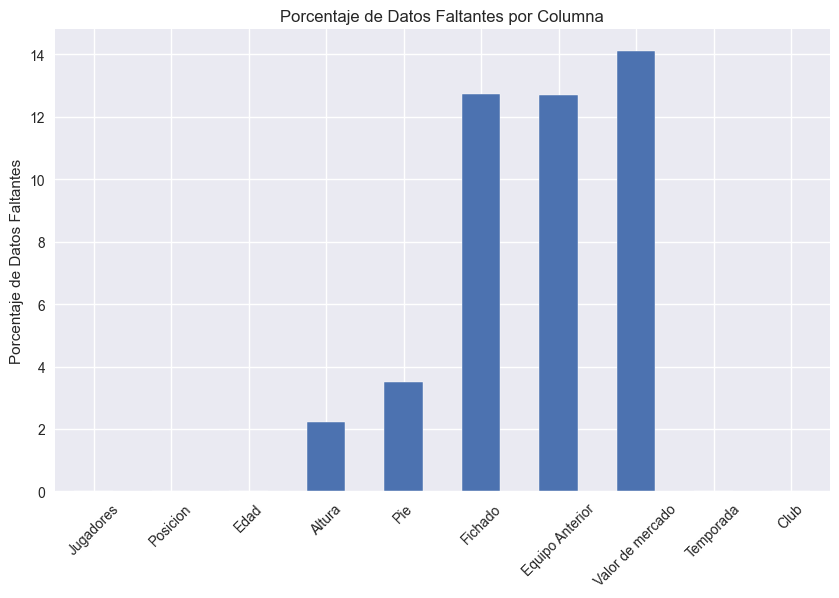

In [128]:
# Leer el archivo Excel
df = pd.read_excel("futbolargentino.xlsx")

# Obtener el porcentaje de datos faltantes
missing_data_percentage = (df.isnull().sum() / len(df)) * 100

# Crear el gráfico
plt.figure(figsize=(10, 6))
missing_data_percentage.plot(kind="bar")
plt.title("Porcentaje de Datos Faltantes por Columna")
plt.ylabel("Porcentaje de Datos Faltantes")
plt.xticks(rotation=45)
plt.show()


Se contempla el porcentaje de datos faltantes en cada columna del excel.

En altura y pie el númeor es menor al 4%. Mientras que en Fichado, Equipo Anterior y Valor de Mercado poseemos valores elevados entre el 12% y 14%.

**Limpieza de datos**

In [129]:

df["Edad"] = pd.to_numeric(df["Edad"], errors="coerce")

Se convierte la columna "Edad" a valores numéricos

In [130]:
# Eliminar filas con valores nulos en las  columnas específicas
df_ = df.dropna(subset=["Altura", "Pie", "Fichado", "Equipo Anterior", "Valor de mercado"])


In [131]:
# Filtrar los jugadores con un valor de mercado mayor a 100,000 euros
df = df[df["Valor de mercado"] > 100000]

In [132]:

# Resetear el índice después del filtrado
df = df.reset_index(drop=True)

# Calcular la tabla de segregación por posición
seg_table = pd.crosstab(df["Posicion"], columns="Count")

# Mostrar la tabla de segregación
print(seg_table)

col_0                 Count
Posicion                   
Centrocampista           33
Defensa                   6
Defensa central        1612
Delantero                20
Delantero centro       1444
Extremo derecho         450
Extremo izquierdo       455
Interior derecho        208
Interior izquierdo      184
Lateral derecho         603
Lateral izquierdo       627
Mediapunta               55
Mediocentro             870
Mediocentro ofensivo    812
Pivote                  805
Portero                 705


Se contemplan las posiciones y la cantidad de jugadores en cada una de ellas, para simplificr se dejan 4 posiciones.

In [133]:

# Eliminar filas con valores 'nan' en la columna "Posicion"
df = df.dropna(subset=["Posicion"])

# Resetear el índice después del filtrado
df = df.reset_index(drop=True)

# Diccionario para mapear las posiciones a las categorías deseadas
posiciones_actualizadas = {
    'Portero': 'Portero',
    'Defensa central': 'Defensor',
    'Lateral izquierdo': 'Defensor',
    'Lateral derecho': 'Defensor',
    'Centrocampista': 'Mediocampista',
    'Pivote': 'Mediocampista',
    'Mediocentro': 'Mediocampista',
    'Interior derecho': 'Mediocampista',
    'Interior izquierdo': 'Mediocampista',
    'Delantero': 'Atacante',
    'Delantero centro': 'Atacante',
    'Extremo derecho': 'Atacante',
    'Extremo izquierdo': 'Atacante',
    'Mediapunta': 'Atacante',
    'Mediocentro ofensivo': 'Atacante'
}

# Crear la nueva columna "Posiciones Actualizada"
df['Posiciones Actualizadas'] = df['Posicion'].map(posiciones_actualizadas)

# Calcular la tabla de segregación por posición
seg_table = pd.crosstab(df["Posiciones Actualizadas"], columns="Count")

# Mostrar la tabla de segregación
print(seg_table)

col_0                    Count
Posiciones Actualizadas       
Atacante                  3236
Defensor                  2842
Mediocampista             2100
Portero                    705


Se cuentan los jugadores de las "Posiciones Actualizadas".

**Distribución del Valor de Mercado de los 10 Jugadores más Caros por Posición**



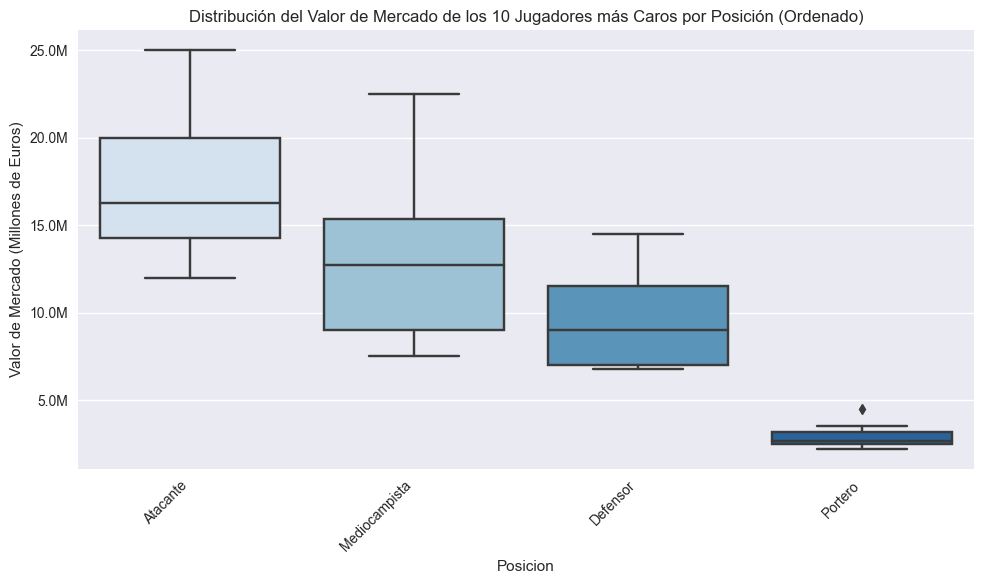

In [135]:


# Filtro para quedarse solo con la última aparición de cada jugador con su máximo valor de mercado
df_unique_jugadores = df.drop_duplicates(subset="Jugadores", keep="last")

# Lista de posiciones actualizadas a considerar
posiciones_a_considerar = ["Atacante", "Mediocampista", "Defensor", "Portero"]

# Lista para almacenar los DataFrames de los 10 jugadores más caros de cada posición
top_10_jugadores_por_posicion = []

# Iteramos sobre las posiciones a considerar y filtramos los 10 jugadores más caros de cada una
for posicion in posiciones_a_considerar:
    jugadores_posicion = df_unique_jugadores[df_unique_jugadores["Posiciones Actualizadas"] == posicion]
    jugadores_posicion_mas_caros = jugadores_posicion.sort_values(by="Valor de mercado", ascending=False).head(10)
    top_10_jugadores_por_posicion.append(jugadores_posicion_mas_caros)

# Concatenamos los DataFrames en una única tabla
tabla_top_10_jugadores = pd.concat(top_10_jugadores_por_posicion)

# Agregar una columna para codificar el orden deseado de las posiciones
orden_posiciones = {"Atacante": 1, "Mediocampista": 2, "Defensor": 3, "Portero": 4}
tabla_top_10_jugadores["Orden Posiciones"] = tabla_top_10_jugadores["Posiciones Actualizadas"].map(orden_posiciones)

# Ordenar el DataFrame según la columna de orden de posiciones
tabla_top_10_jugadores = tabla_top_10_jugadores.sort_values(by="Orden Posiciones")

# Configurar el estilo del gráfico
plt.style.use("seaborn")

# Crear el gráfico de cajas
plt.figure(figsize=(10, 6))
sns.boxplot(data=tabla_top_10_jugadores, x="Posiciones Actualizadas", y="Valor de mercado", palette="Blues", order=posiciones_a_considerar)

# Formatear el eje Y para mostrar los valores en millones y sin notación exponencial
def millions_formatter(x, pos):
    return f'{x / 1e6:.1f}M'

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Etiquetas del eje X inclinadas a 45 grados
plt.xticks(rotation=45, ha='right')

# Etiquetas de los ejes y título del gráfico
plt.xlabel("Posicion")
plt.ylabel("Valor de Mercado (Millones de Euros)")
plt.title("Distribución del Valor de Mercado de los 10 Jugadores más Caros por Posición (Ordenado)")

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Se visualiza la distribución del valor de mercado de los 10 jugadores más caros en cada una de las posiciones: Atacante, Mediocampista, Defensor y Portero.

En el análisis, se observa que la posición de Atacante cuenta con el mayor valor de mercado, lo cual es coherente con las expectativas debido a la alta demanda de jugadores ofensivos. A continuación, se encuentra el puesto de Mediocampista, que también muestra un valor significativo en el mercado. Por otro lado, la posición de Defensor posee valores de mercado inferiores en comparación con las dos anteriores, y finalmente, el puesto de Portero presenta una considerable diferencia con el menor valor de mercado en relación a las otras posiciones.

El gráfico de cajas brinda una representación clara de las diferencias en los valores de mercado entre estas posiciones y permite identificar la importancia y demanda de cada rol en el mundo del fútbol.

**Valor Promedio de Mercado por Posición de los Jugadores**

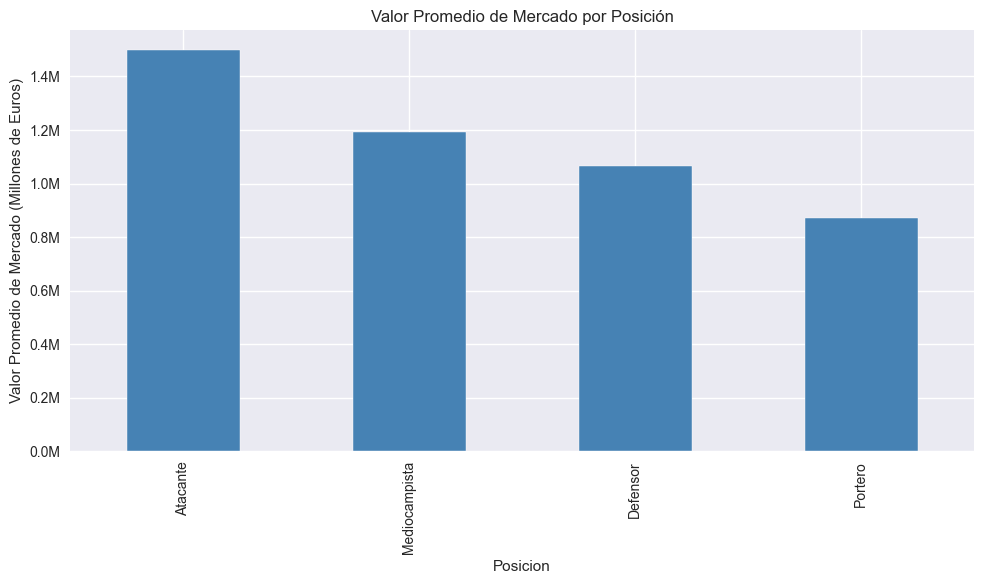

In [136]:

# Filtrar los jugadores con un valor de mercado mayor a 100,000 euros
df = df[df["Valor de mercado"] > 100000]

# Crear la nueva columna "Posiciones Actualizada"
df['Posiciones Actualizada'] = df['Posicion'].map(posiciones_actualizadas)

# Calcular el valor promedio por posición actualizada
valor_promedio_por_posicion = df.groupby('Posiciones Actualizada')['Valor de mercado'].mean().sort_values(ascending=False)

# Configurar el estilo del gráfico
plt.style.use("seaborn")

# Crear el gráfico de barras 
plt.figure(figsize=(10, 6))
valor_promedio_por_posicion.plot(kind='bar', color='steelblue')

# Formatear el eje Y para mostrar los valores en millones y sin notación exponencial
def millions_formatter(x, pos):
    return f'{x / 1e6:.1f}M'

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Etiquetas de los ejes y título del gráfico
plt.xlabel("Posicion")
plt.ylabel("Valor Promedio de Mercado (Millones de Euros)")
plt.title("Valor Promedio de Mercado por Posición")

# Mostrar el gráfico
plt.tight_layout()
plt.show()

En este gráfico de barras, se presenta el valor promedio de mercado de los jugadores clasificados según su posición actualizada. Para ello, se han filtrado los jugadores con un valor de mercado mayor a 100,000 euros, lo que nos permite centrarnos en los jugadores de mayor relevancia económica en el mercado futbolístico.

En el eje horizontal del gráfico, se encuentran las diferentes posiciones actualizadas, tales como "Atacante", "Mediocampista", "Defensor" y "Portero". Mientras que en el eje vertical, se muestra el valor promedio de mercado expresado en millones de euros.

Se puede observar que los jugadores de la posición "Atacante" presentan el mayor valor promedio de mercado, alcanzando casi un millón y medio de euros. A continuación, los jugadores de la posición "Mediocampista" se sitúan con un valor promedio cercano a 1.2 millones de euros. Los jugadores clasificados como "Defensores" mantienen un promedio de valor de mercado de poco más de 1 millón de euros, mientras que los "Porteros" se encuentran con un valor promedio ligeramente superior a los 800 mil euros.

**Evolución del Valor de Mercado en el Fútbol Argentino**

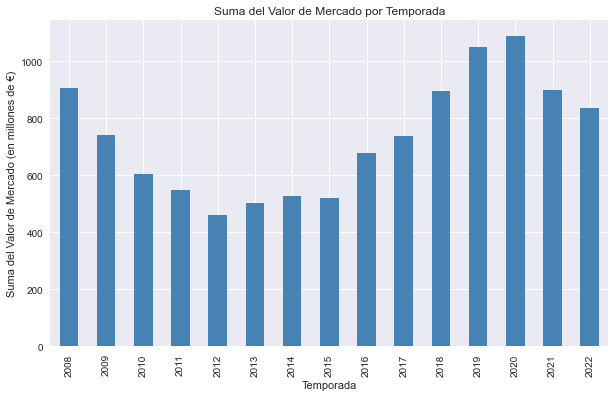

In [11]:


# Agrupar por temporada y calcular la suma de los valores de mercado
market_value_sum = df.groupby("Temporada")["Valor de mercado"].sum()

# Configurar el estilo del gráfico
plt.style.use("seaborn")

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
market_value_sum.plot(kind="bar", ax=ax, color="steelblue")

# Configurar los ejes y título del gráfico
ax.set_xlabel("Temporada")
ax.set_ylabel("Suma del Valor de Mercado (en millones de €)")
ax.set_title("Suma del Valor de Mercado por Temporada")

# Ajustar el formato del eje Y para mostrar los valores en millones
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x/1000000)}"))

# Mostrar el gráfico
plt.show()

Desde el año 2008 hasta 2012, se observa una tendencia descendente en el valor de mercado, indicando posiblemente un ajuste en el mercado o factores externos que influyeron en la valoración de los jugadores. Luego, entre 2013 y 2020, se registra una recuperación gradual, aunque moderada, del valor de mercado. Sin embargo, el año 2021 se destaca con un aumento significativo en el valor, marcando un punto álgido en la industria futbolística. A partir de 2021 hasta 2022, se observa una leve disminución en el valor de mercado, mostrando nuevamente un comportamiento descendente.

El gráfico ofrece una perspectiva interesante sobre la evolución económica.

**Visualizando la Evolución del Valor de Mercado por Temporada: Un Mapa de Calor**

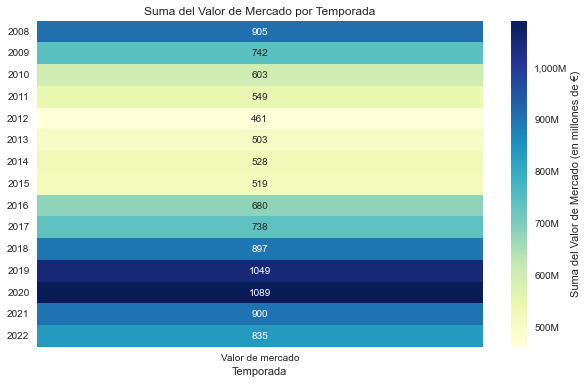

In [21]:

# Agrupar por temporada y calcular la suma de los valores de mercado
market_value_sum = df.groupby("Temporada")["Valor de mercado"].sum()

# Crear una tabla pivot para el mapa de calor
table = pd.pivot_table(df, values="Valor de mercado", index="Temporada", aggfunc="sum")

# Redondear los valores dentro de la tabla del mapa de calor
table = table.applymap(lambda x: round(x / 1000000))

# Calcular vmin y vmax para establecer un tono de azul claro
vmin = table.values.min()
vmax = table.values.max() + 1

# Crear un mapa de calor utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(table, annot=True, fmt=".0f", cmap="YlGnBu", cbar=True, cbar_kws={"label": "Suma del Valor de Mercado (en millones de €)",
                                                                              "format": FuncFormatter(lambda x, pos: f"{int(x):,}M")},
            vmin=vmin, vmax=vmax)  # Establecer los límites de la barra de color
plt.title("Suma del Valor de Mercado por Temporada")
plt.xlabel("Temporada")
plt.ylabel("")

# Mostrar el mapa de calor
plt.show()


En este mapa de calor, se presenta la evolución del valor de mercado en el fútbol a lo largo de las temporadas desde un punto de vista visualmente atractivo y fácil de interpretar. Cada celda del mapa de calor representa la suma total del valor de mercado de todos los jugadores en millones de euros para una temporada específica.

El eje vertical muestra las temporadas, mientras que el eje horizontal representa la progresión del tiempo. Los tonos de azul indican la magnitud del valor de mercado, donde los tonos más oscuros representan valores más bajos y los tonos más claros indican valores más altos.

El mapa de calor permite visualizar rápidamente las tendencias generales en el valor de mercado a lo largo de los años. Se observan períodos de crecimiento y declive, destacando los años donde se han alcanzado cifras significativas en el valor de mercado de los jugadores. La paleta de colores seleccionada, que va desde tonos suaves de azul hasta tonos más intensos, resalta los cambios importantes en la valoración de los jugadores a través del tiempo.

**Análisis Comparativo del Valor Promedio del Mercado por Club en el Fútbol Argentino**

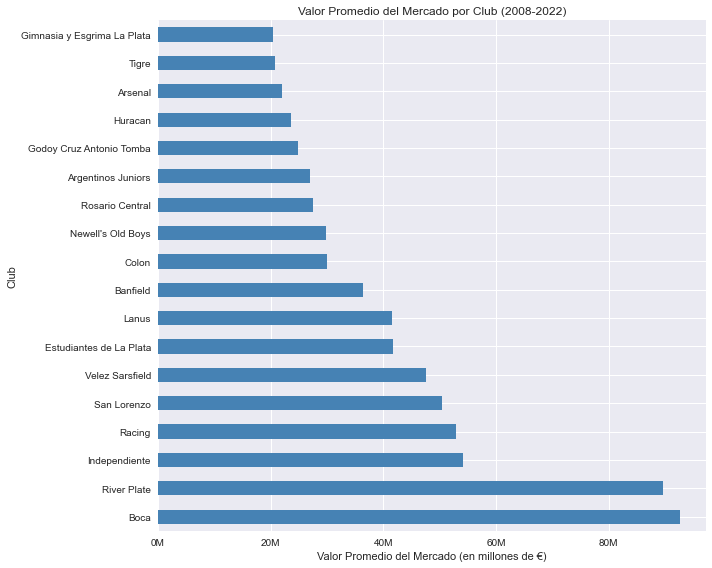

In [13]:

# Filtrar los jugadores con un valor de mercado mayor a 100,000 euros
filtered_df = df[df["Valor de mercado"] > 100000]

# Calcular el valor total del mercado por "Club" y "Temporada"
valor_total_mercado = filtered_df.groupby(["Club", "Temporada"])["Valor de mercado"].sum().unstack()

# Calcular el valor promedio del mercado por "Club" en todas las temporadas
valor_promedio_general = valor_total_mercado.mean(axis=1).sort_values(ascending=False)

# Configurar el estilo del gráfico
plt.style.use("seaborn")

# Crear el gráfico de barras horizontales
fig, ax = plt.subplots(figsize=(10, 8))
valor_promedio_general.plot(kind="barh", ax=ax, color="steelblue")

# Configurar los ejes y título del gráfico
ax.set_ylabel("Club")
ax.set_xlabel("Valor Promedio del Mercado (en millones de €)")
ax.set_title("Valor Promedio del Mercado por Club (2008-2022)")

# Ajustar el formato del eje X para mostrar los valores en millones
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x/1000000)}M"))

# Mostrar el gráfico
plt.tight_layout()
plt.show()

En este gráfico de barras horizontales se presenta un análisis comparativo del valor promedio del mercado de clubes de fútbol durante el período comprendido entre 2008 y 2022. Los datos reflejan la suma total del valor de mercado de los jugadores de cada club y temporada, proporcionando una visión clara de la situación económica de cada entidad deportiva.

Las barras horizontales representan los diferentes clubes, mientras que el eje vertical muestra el valor promedio del mercado en millones de euros. Los clubes con mayor valor promedio aparecen en la parte superior del gráfico, y los clubes con menor valor promedio se encuentran en la parte inferior.

De acuerdo con el análisis, Boca Juniors y River Plate destacan significativamente por encima de los demás clubes, con una clara diferencia de valor en comparación con el resto. A continuación, se encuentran Independiente, San Lorenzo, Racing y Vélez Sarsfield, con valores considerables pero más distantes de los dos líderes.

En contraste, Gimnasia, Tigre, Arsenal y Huracán presentan los valores promedio del mercado más bajos, ubicándose en la parte inferior del gráfico.

**Evolución del Promedio de Edad de los Jugadores por Temporada**

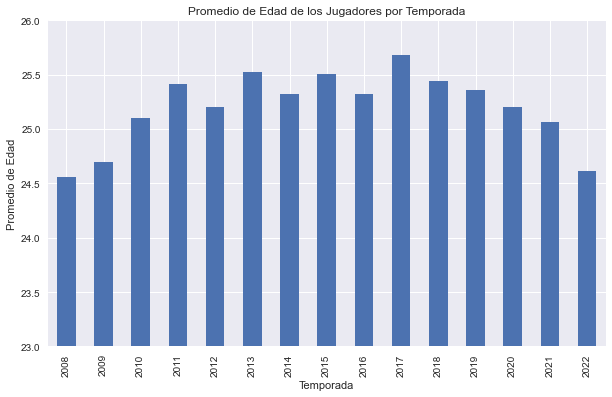

In [16]:
# Filtrar los jugadores con un valor de mercado mayor a 100,000 euros
df = df[df["Valor de mercado"] > 100000]

# Calcular los promedios de edad por temporada
promedios_edad = df.groupby("Temporada")["Edad"].mean()

# Configurar el estilo del gráfico
plt.style.use("seaborn")

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
promedios_edad.plot(kind="bar", ax=ax)
ax.set_xlabel("Temporada")
ax.set_ylabel("Promedio de Edad")
ax.set_title("Promedio de Edad de los Jugadores por Temporada")

# Establecer límites del eje Y
ax.set_ylim(23, 26)

plt.show()

En este gráfico de barras, se muestra la evolución del promedio de edad de los jugadores en el fútbol a lo largo de diferentes temporadas, desde 2008 hasta 2022. El promedio de edad se encuentra en un rango estrecho, entre los 24 y 26 años, lo que indica una estabilidad en la edad promedio de los futbolistas a lo largo del tiempo.

El eje horizontal representa las temporadas, mientras que el eje vertical muestra el promedio de edad de los jugadores. 
Desde 2008 hasta 2017, se observa un incremento gradual en el promedio de edad, alcanzando su punto más alto. A partir de 2017, el promedio de edad comienza a descender, manteniéndose en valores muy similares.

**Distribución de la Preferencia de Pie**

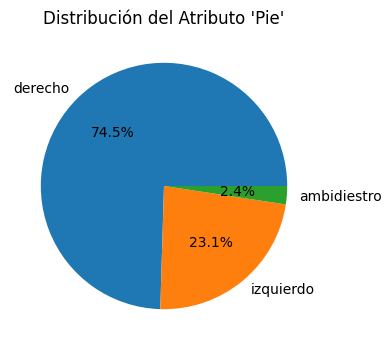

In [23]:

# Contar la frecuencia de cada valor en la columna "Pie"
footed_counts = df["Pie"].value_counts()

# Configurar el estilo del gráfico
plt.style.use("default")

# Crear el gráfico de torta con fondo blanco
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_facecolor("white")
ax.pie(footed_counts, labels=footed_counts.index, autopct='%1.1f%%')
ax.set_title("Distribución del Atributo 'Pie'")

plt.show()


En el gráfico de torta, se muestra que aproximadamente el 75% de los jugadores son diestros, mientras que alrededor del 23% son zurdos. Es importante destacar que en la población mundial, la prevalencia de personas zurdas es de aproximadamente el 10% (según estudios demográficos).

Esta discrepancia sugiere que en el contexto del fútbol argentino, existe una mayor proporción de jugadores zurdos en comparación con la población general. Esta observación podría tener implicaciones técnicas y estratégicas en el fútbol, ya que los jugadores zurdos pueden aportar ciertas ventajas en el campo debido a su relativa rareza.

La mayor presencia de jugadores zurdos podría deberse a diversas razones. Por ejemplo, algunos estudios sugieren que los jugadores zurdos pueden tener ventajas inesperadas en ciertos deportes, como el fútbol, debido a la sorpresa y la falta de familiaridad que pueden generar en sus oponentes, que están más acostumbrados a enfrentarse a jugadores diestros. Esto puede llevar a situaciones donde los jugadores zurdos pueden tomar decisiones más inesperadas y difíciles de prever para los defensores diestros.

**Tendencia de Alturas de los Jugadores**

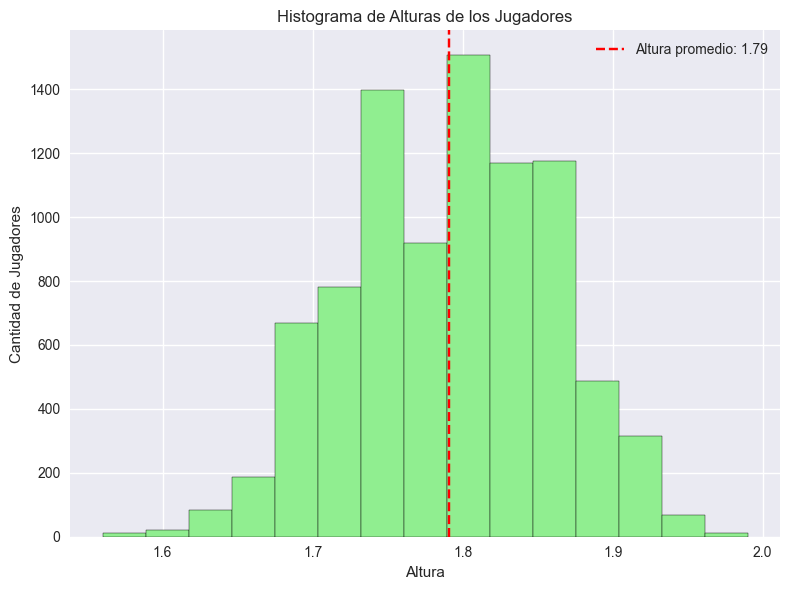

In [27]:

# Calcular la altura promedio
altura_promedio = df["Altura"].mean()

# Configurar el estilo del gráfico
plt.style.use("seaborn")

# Crear el histograma
plt.figure(figsize=(8, 6))
plt.hist(df["Altura"], bins=15, color="lightgreen", edgecolor="black")

# Marcar la altura promedio con una línea vertical
plt.axvline(x=altura_promedio, color="red", linestyle="--", label=f"Altura promedio: {altura_promedio:.2f}")

# Etiquetas de los ejes y título del gráfico
plt.xlabel("Altura")
plt.ylabel("Cantidad de Jugadores")
plt.title("Histograma de Alturas de los Jugadores")
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Este gráfico muestra la distribución de alturas de los jugadores en el fútbol argentino. 

Las alturas varían considerablemente, con jugadores que oscilan entre apenas 1,60 metros y otros que superan los 1,90 metros. 

Sin embargo, la gran mayoría de los jugadores se encuentran en el rango de 1,70 a 1,85 metros, lo que refleja una tendencia hacia alturas cercanas al promedio de 1,79 metros marcado por la línea vertical roja punteada en el histograma.

**Tendencia de Alturas por Posición de los Jugadores**

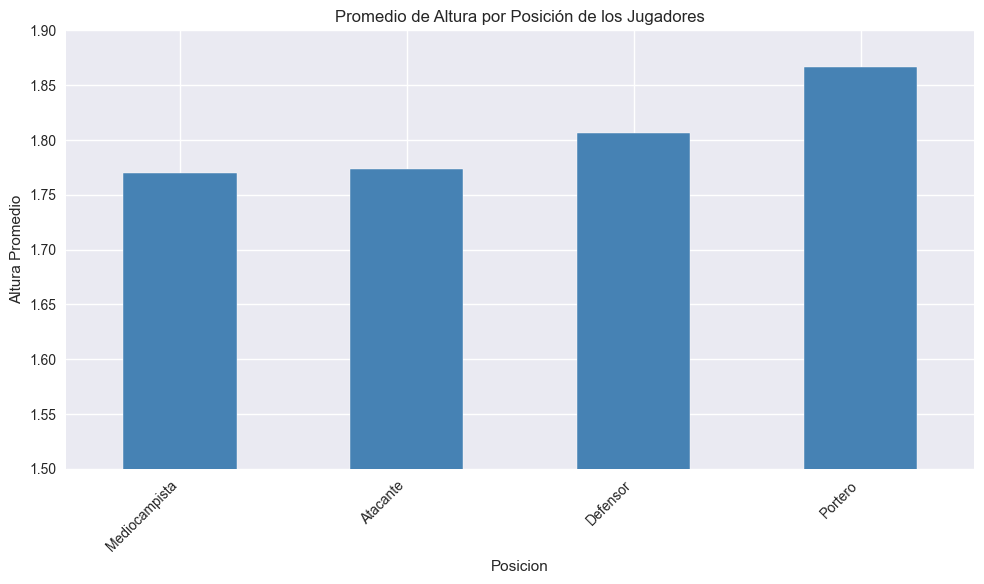

In [59]:

# Filtrar los jugadores con un valor de mercado mayor a 100,000 euros
filtered_df = filtered_df[filtered_df["Valor de mercado"] > 100000]

#Calcular el promedio de altura para cada posición
average_height_per_position = df.groupby("Posiciones Actualizada")["Altura"].mean().sort_values()

#Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
average_height_per_position.plot(kind="bar", ax=ax, color="steelblue")

#Etiquetas del eje X inclinadas a 45 grados
ax.set_xticklabels(average_height_per_position.index, rotation=45, ha='right')

#Etiquetas de los ejes y título del gráfico
ax.set_xlabel("Posicion")
ax.set_ylabel("Altura Promedio")
ax.set_title("Promedio de Altura por Posición de los Jugadores")

# Establecer límites en el eje Y
ax.set_ylim(1.5, 1.9)

#Mostrar el gráfico
plt.tight_layout()
plt.show()

Este gráfico presenta el promedio de alturas para cada posición de los jugadores en el fútbol argentino. 

Se puede observar que tanto los Mediocampistas como los Atacantes tienen alturas muy similares, con un promedio de alrededor de 1,77 metros. Los Defensores, por otro lado, tienen un promedio ligeramente más alto, alcanzando los 1,81 metros. Como era de esperar, los Porteros tienen una altura significativamente más elevada, superando los 1,85 metros. 

Estas diferencias en la altura promedio entre las distintas posiciones resaltan la diversidad física que se encuentra en este deporte.

**Distribución de Edades de los Jugadores en el Fútbol Argentino**

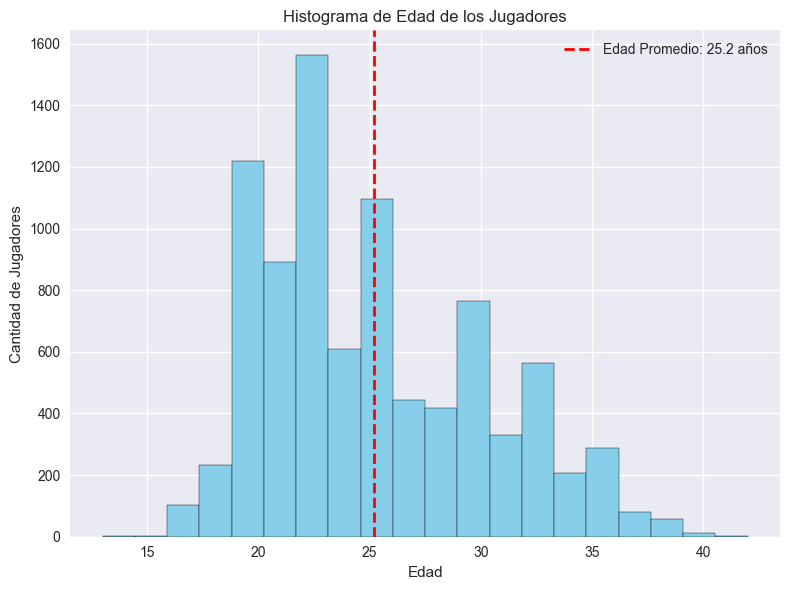

In [24]:
# Calcular la edad promedio de los jugadores
edad_promedio = df["Edad"].mean()

# Configurar el estilo del gráfico
plt.style.use("seaborn")

# Crear el histograma
plt.figure(figsize=(8, 6))
plt.hist(df["Edad"], bins=20, color="skyblue", edgecolor="black")

# Agregar línea vertical para mostrar la edad promedio
plt.axvline(edad_promedio, color="red", linestyle="--", linewidth=2, label=f"Edad Promedio: {edad_promedio:.1f} años")

# Etiquetas de los ejes y título del gráfico
plt.xlabel("Edad")
plt.ylabel("Cantidad de Jugadores")
plt.title("Histograma de Edad de los Jugadores")
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Este gráfico presenta la distribución de edades de los jugadores en el fútbol argentino.

 Se ha calculado la edad promedio de los jugadores y se muestra con una línea vertical en color rojo. La mayoría de los jugadores se encuentran en torno a la edad promedio, la cual es de aproximadamente 25 años.
 
  A medida que nos alejamos de esta edad promedio, la cantidad de jugadores disminuye, formando una distribución en forma de campana. 
 
 El histograma proporciona una visión general de la distribución de edades y nos permite observar la prevalencia de ciertos grupos de edades en el fútbol argentino.

**Evolución del Promedio de Nuevos Jugadores por Temporada**

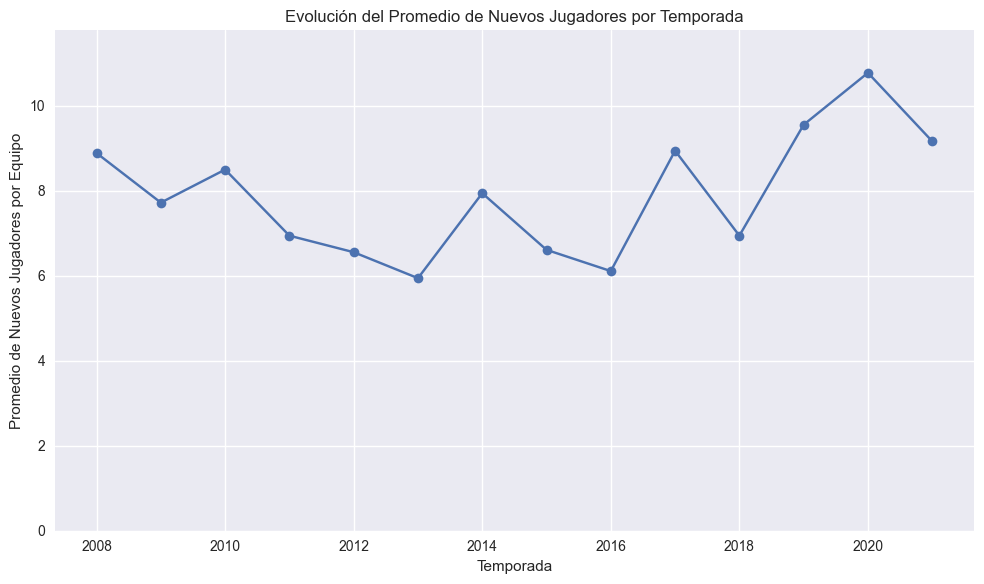

In [44]:


# Filtro para quedarse solo con la última aparición de cada jugador con su máximo valor de mercado
df_unique_jugadores = df.drop_duplicates(subset="Jugadores", keep="last")

# Contar la cantidad de jugadores únicos por año
nuevos_jugadores_por_anio = df_unique_jugadores.groupby("Temporada")["Jugadores"].nunique().reset_index()

# Filtrar hasta la Temporada 2021
nuevos_jugadores_por_anio = nuevos_jugadores_por_anio[nuevos_jugadores_por_anio["Temporada"] <= 2021]

# Calcular el número promedio de nuevos jugadores por temporada (dividido por 16)
nuevos_jugadores_por_anio["Promedio de Nuevos Jugadores"] = nuevos_jugadores_por_anio["Jugadores"] / 18

# Configurar el estilo del gráfico
plt.style.use("seaborn")

# Crear el gráfico lineal
plt.figure(figsize=(10, 6))
plt.plot(nuevos_jugadores_por_anio["Temporada"], nuevos_jugadores_por_anio["Promedio de Nuevos Jugadores"], marker='o', color='b')

# Establecer límites del eje Y para comenzar en 0
plt.ylim(0, nuevos_jugadores_por_anio["Promedio de Nuevos Jugadores"].max() + 1)

# Etiquetas de los ejes y título del gráfico
plt.xlabel("Temporada")
plt.ylabel("Promedio de Nuevos Jugadores por Equipo")
plt.title("Evolución del Promedio de Nuevos Jugadores por Temporada")

# Mostrar el gráfico
plt.tight_layout()
plt.show()



En este gráfico se muestra la evolución del promedio de nuevos jugadores por equipo en cada temporada del fútbol argentino. 

Se observa que en cada año, los equipos suelen incorporar entre 6 y 11 nuevos jugadores en promedio. 

A lo largo de las temporadas, el promedio varía ligeramente, pero se mantiene dentro de ese rango. E

l gráfico de línea nos permite visualizar cómo ha fluctuado la cantidad de nuevos jugadores por equipo a lo largo de los años, proporcionando información valiosa sobre las tendencias de incorporación de talento en el fútbol argentino.